# Time Series Modeling and Forecasting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_ts = pd.read_csv('../../data/Biomass_History.csv', index_col=0)
df_ts.head()

Latitude  Longitude       2010       2011       2012       2013  \
Index                                                                    
0      24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1      24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   

            2014       2015       2016        2017  
Index                                               
0      10.788374   6.647325   7.387925    5.180296  
1      34.419411  27.361908  40.431847   42.126945  
2      70.917908  42.517117  59.181629   73.203232  
3      93.513924  70.203171  74.536720  101.067352  
4      19.534035  19.165791  16.531315   26.086885

<Axes: title={'center': 'Biomass History'}, xlabel='Index'>

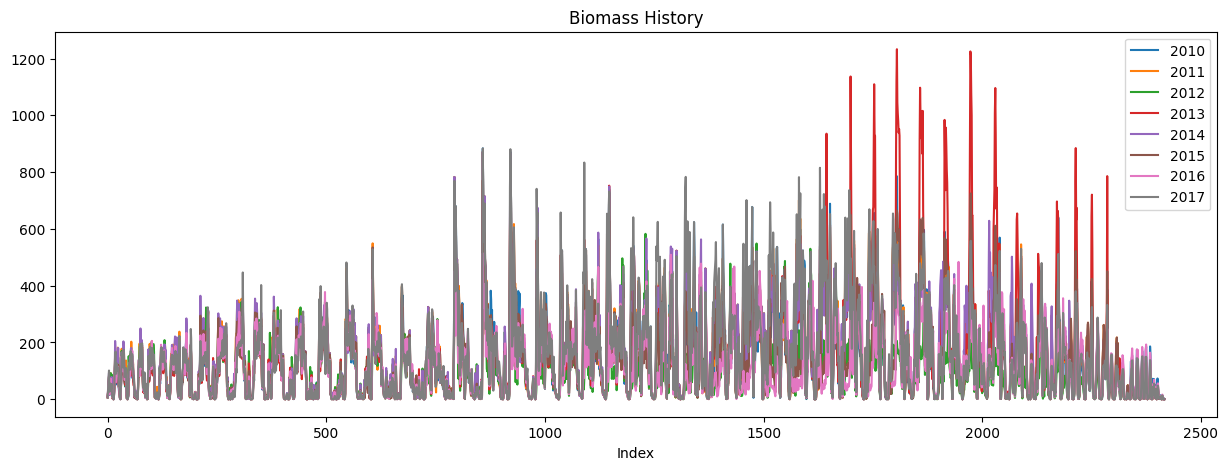

In [4]:
df_ts.iloc[:, 2:].plot(figsize=(15, 5), title='Biomass History')

<Axes: >

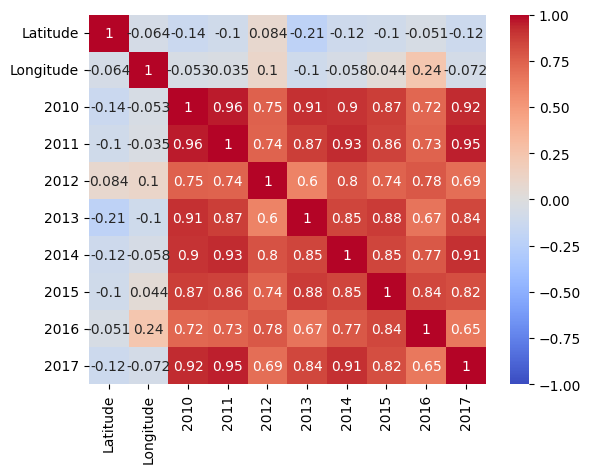

In [5]:
import seaborn as sns
df_corr = df_ts.iloc[:, :].corr()
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

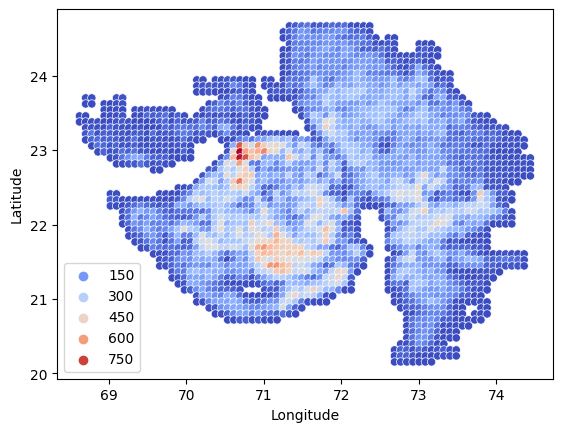

In [6]:
df_avg = df_ts.iloc[:, 2:].mean(axis=1)
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue=df_avg, palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

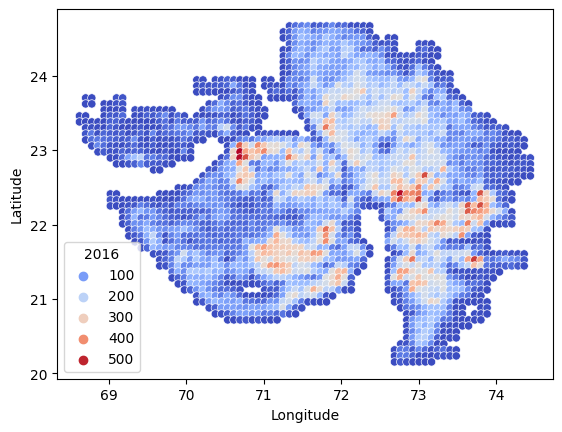

In [7]:
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue='2016', palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

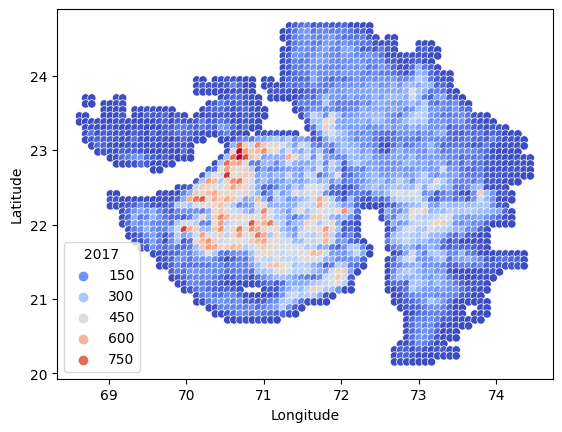

In [8]:
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue='2017', palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

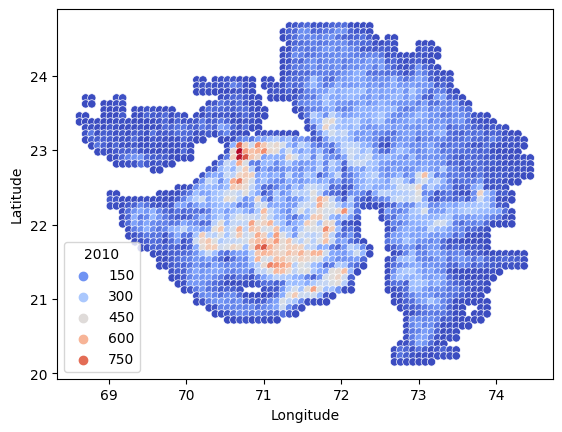

In [9]:
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue='2010', palette='coolwarm')

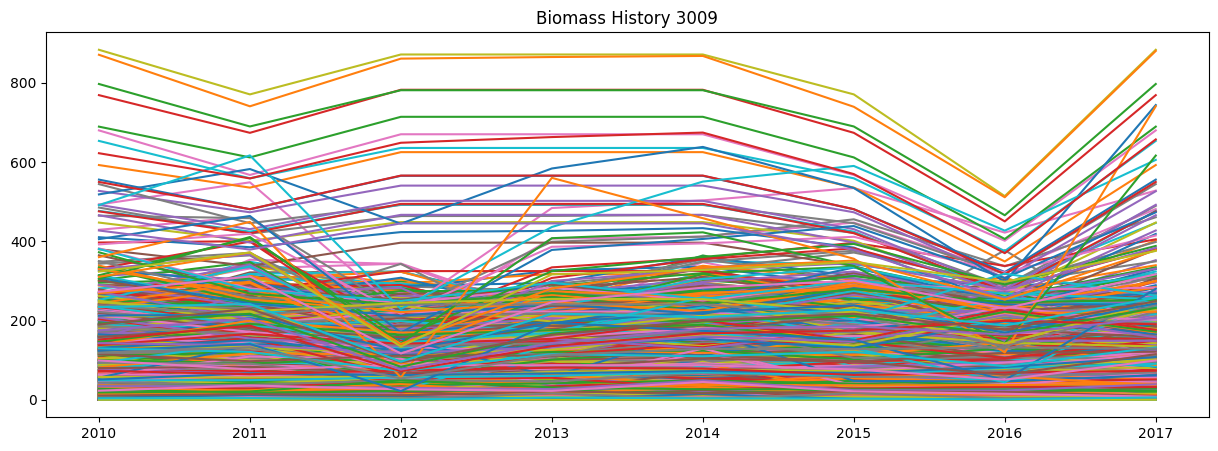

In [10]:
for i in range(1000):
    df_ts.iloc[i, 2:].plot(figsize=(15, 5), title=f'Biomass History {2010+i}')

c:\Users\alber\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


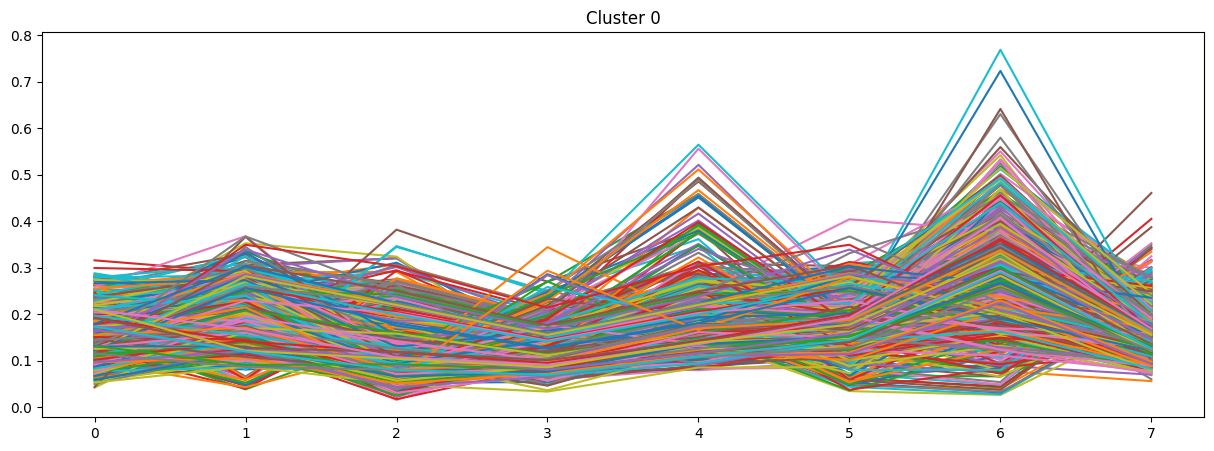

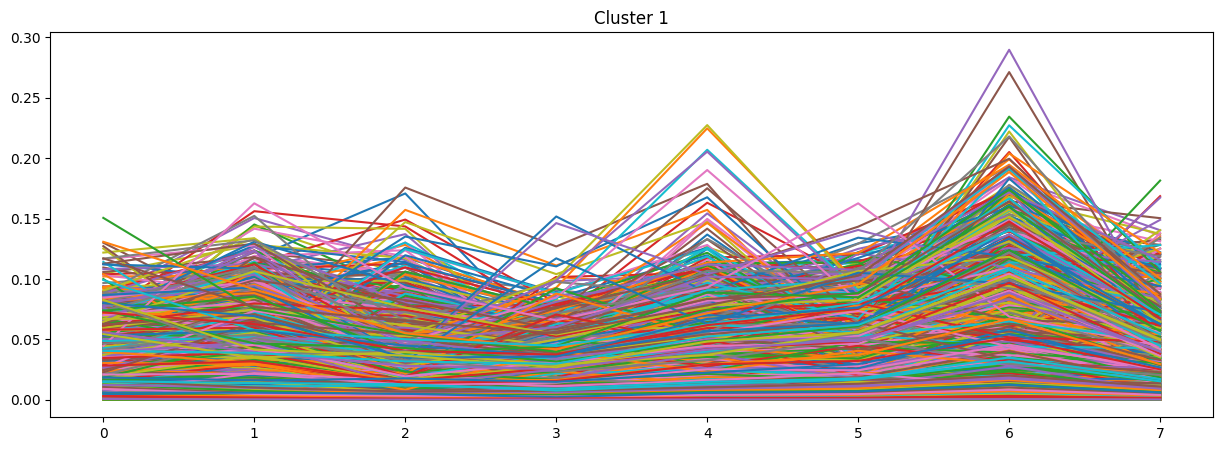

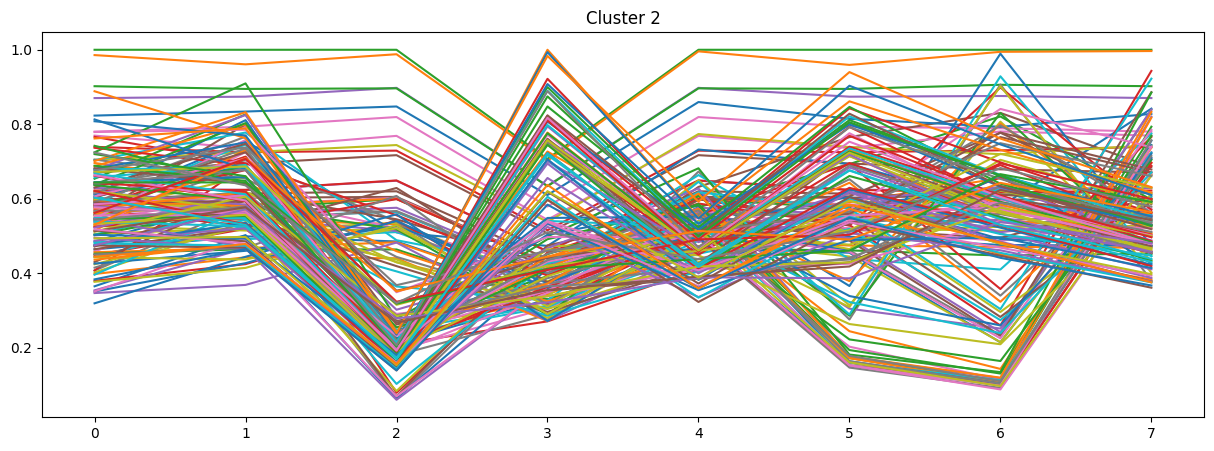

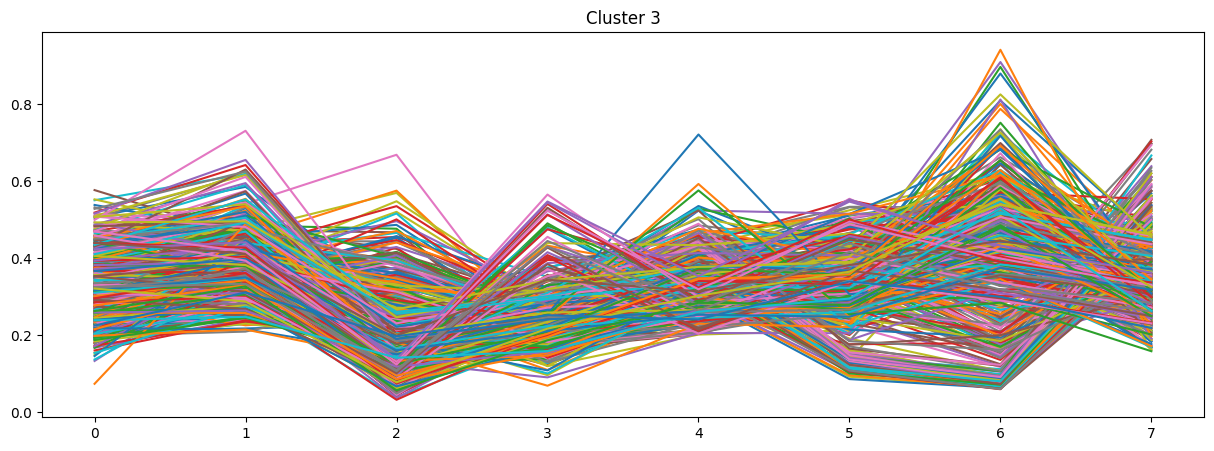

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

k = 4
km = KMeans(n_clusters=k)
scaler = MinMaxScaler()
X = df_ts.iloc[:, 2:]
X = pd.DataFrame(scaler.fit_transform(X))
km.fit(X)
X['cluster'] = km.labels_

for k in range(k):
    X[X['cluster'] == k].iloc[:, :-1].T.plot(figsize=(15, 5), title=f'Cluster {k}', legend=False)
    plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

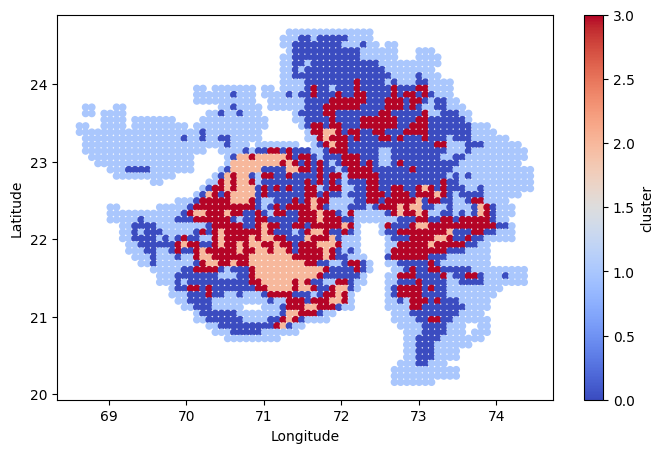

In [58]:
df_2 = df_ts.copy()
df_2['cluster'] = km.labels_
df_2.plot.scatter(x='Longitude', y='Latitude', c='cluster', colormap='coolwarm', figsize=(8, 5))

<Axes: xlabel='Year', ylabel='Biomass'>

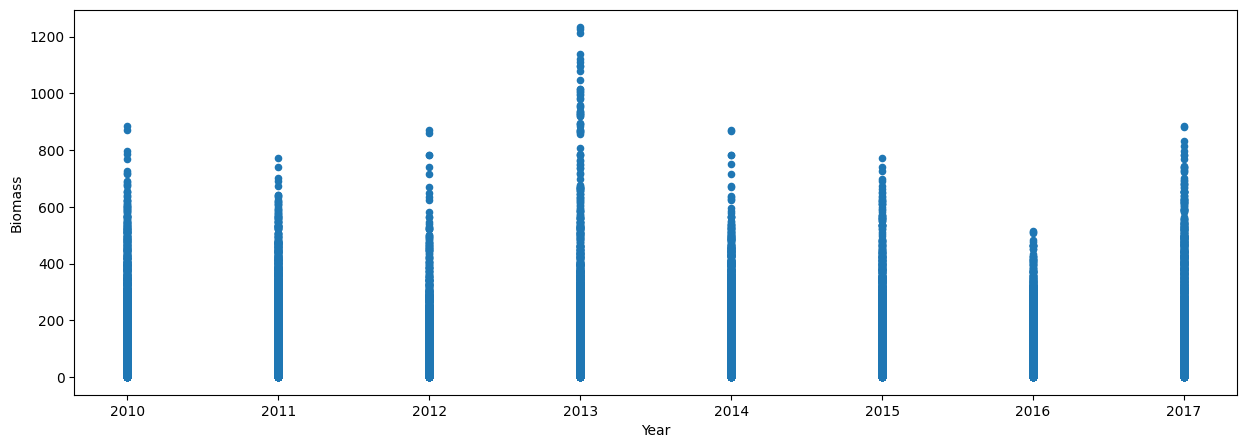

In [30]:
df_ts_time = df_ts.iloc[:, 2:]
df_ts_time = df_ts_time.melt(id_vars=None, value_vars=df_ts_time.columns, var_name='Year', value_name='Biomass')
df_ts_time.plot.scatter(x='Year', y='Biomass', figsize=(15, 5))